In [82]:
# Exploratory analysis to investigate correlation between
# Country/region's GDP growth rate and use of sustainable 
# actions for environemntal and social considerations
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

In [83]:
# read in csv data file
df = pd.read_csv('ESGData.csv')

In [84]:
# filter dataframe for GDP
gdp    = df['Indicator Name'] == 'GDP growth (annual %)'
df_gdp = df[gdp]
df_gdp[['Country Name','Indicator Name','2015']].head()

,Country Name,Indicator Name,2015
23,Arab World,GDP growth (annual %),3.243312
90,Caribbean small states,GDP growth (annual %),0.981287
157,Central Europe and the Baltics,GDP growth (annual %),3.980466
224,Early-demographic dividend,GDP growth (annual %),4.616404
291,East Asia & Pacific,GDP growth (annual %),4.196838


In [85]:
country = df_gdp['Country Name'].to_list()
#print(country)
gdp_list = df_gdp['2015'].to_list()
#print(gdp_list)

In [86]:
# filter dataframe for Renewable Energy Consumption
#rnw = df[['Country Name','Indicator Name','2015']]
#RnwEngy = rnw.rename(columns={'2015': 'rnw2015'})
#nwEngy.loc[RnwEngy['Indicator Name'] == 'Renewable energy consumption (% of total final energy consumption)']

rnw    = df['Indicator Name'] == 'Renewable energy consumption (% of total final energy consumption)'
df_rnw = df[rnw]
df_rnw[['Country Name','Indicator Name','2015']].head()


,Country Name,Indicator Name,2015
56,Arab World,Renewable energy consumption (% of total final...,4.094037
123,Caribbean small states,Renewable energy consumption (% of total final...,8.825977
190,Central Europe and the Baltics,Renewable energy consumption (% of total final...,17.121893
257,Early-demographic dividend,Renewable energy consumption (% of total final...,25.554845
324,East Asia & Pacific,Renewable energy consumption (% of total final...,13.857603


In [87]:
rnw_list = df_rnw['2015'].to_list()
#print(rnw_list)

In [88]:
# filter dataframe for Ratio of female to male labor force participation rate (%) (modeled ILO estimate)
ftm    = df['Indicator Name'] == 'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)'
df_ftm = df[ftm]
df_ftm[['Country Name','Indicator Name','2015']].head()

,Country Name,Indicator Name,2015
53,Arab World,Ratio of female to male labor force participat...,31.352899
120,Caribbean small states,Ratio of female to male labor force participat...,74.709202
187,Central Europe and the Baltics,Ratio of female to male labor force participat...,75.276981
254,Early-demographic dividend,Ratio of female to male labor force participat...,45.259790
321,East Asia & Pacific,Ratio of female to male labor force participat...,77.589263


In [152]:
ftm_list = df_ftm['2015'].to_list()
#print(ftm_list)

Text(0, 0.5, 'GDP growth (annual %)')

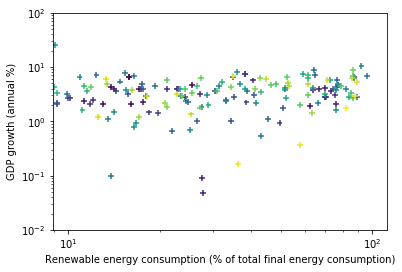

In [159]:
# The above is just to show some of the nubmers obtained from the dataset
# Now let's make some plots to visualize the data

# first let's plot annual GDP % growth rate to Renewable energy consumption and see if there is a positive correlation
cmap = plt.get_cmap('viridis')
mycolors = cmap(np.linspace(0,1,len(country)))

fig = plt.figure()
ax = plt.gca()
ax.set_ylim([0.01,100])
#ax.scatter(rnw_list, gdp_list)
#ax.scatter(rnw_list, gdp_list, s=100,marker='+', mycolors)
ax.scatter(rnw_list, gdp_list,s=35, c=mycolors, marker='+')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Renewable energy consumption (% of total final energy consumption)')
ax.set_ylabel('GDP growth (annual %)')


Text(0, 0.5, 'GDP growth (annual %)')

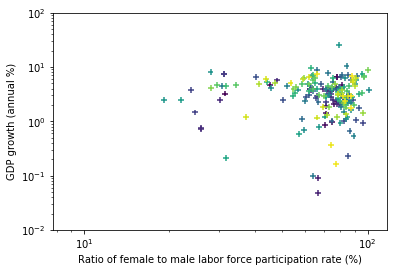

In [173]:
# now let's plot annual GDP% growth rate to Ratio of female to male labor force participation rate (%)
cmap2 = plt.get_cmap('hot')
mycolors2 = cmap(np.linspace(0,1,len(country)))
fig2 = plt.figure()
ax2 = plt.gca()
ax2.set_ylim([0.01,100])
ax2.scatter(ftm_list, gdp_list, s=35, c=mycolors2, marker='+', label=country)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('Ratio of female to male labor force participation rate (%)')
ax2.set_ylabel('GDP growth (annual %)')


In [161]:
# This *explatory* analysis is super preliminary. 
# Having the idea to look at these correlations was the hardest part
# You can see that there is a very slight trend in positive correlation between
# annual GDP growth rate % and renewable energy consumption, and
# annual GDP growh rate % and the ratio of female to male labor in the workforce
# There are a handful of outliers that show quite strong positive correlations.
# This hints that promotion and marketing of sustainable (environmental and social) actions
# may have a positive effect on GDP growth rate. 
# More studies can surely be done to cross reference more data and infer market drivers.
# I would really love to be able to be part of the data incubator and watch this project flourish!
# :)